<a href="https://colab.research.google.com/github/dratul/ImageFilters/blob/main/Image_Processing_13_Image_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 #  Image Restoration

# Introduction

In [ ]:
#loading All dependencies
import numpy as np
import pandas as pd
import cv2 as cv
#from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift
from skimage.restoration import inpaint
#Mounting Google Drive to read files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def show_image(image_variable, title='Image', cmap_type='gray'):
    plt.imshow(image_variable, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [ ]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

## 1.1 Introduction
Image restoration is the process of recovering an image that has been degraded by noise, blur, or other distortions. It is a crucial step in many image processing applications, such as medical imaging, remote sensing, security, and digital forensics. However, choosing the appropriate image restoration technique for different applications and domains is not a trivial task. It depends on several factors, such as the type and level of degradation, the prior knowledge about the image, the desired output quality, and the computational resources available.
Image restoration usaully considers image formation process


$g(x)=  𝒩 \space {\{f(x)*h(x)}\}$
> Where g is the observed or aquired image, f is the ideal or original image. h is the filter which explains the distoration caused in the image that is defined as spreading of data from a given pixel f(x) to a neighbourhood centred in g(x) and $𝓝$ is the stochastic process that explains the noise in image g(x).



## 1.2 Difference between Image enhancement and image restoration
Image enhancement is based on subjective methods that improve quality of images whereas image restoration is objective method based on prior model about image degradation.



## 1.3 Types of degradation

One of the first steps in comparing and contrasting different image restoration methods and algorithms is to identify the type and source of degradation that affects the image. Degradation can be caused by various factors, such as camera motion, lens blur, atmospheric turbulence, sensor noise, compression artifacts, or intentional manipulation. Depending on the type of degradation, different image restoration methods and algorithms may be more or less suitable and effective. For example, some methods may work well for deblurring images, while others may be better for denoising or inpainting images.




## 1.4 Degradation function or point spread function

The first step in image restoration is to understand how the image has been degraded and what kind of model can describe it. A degradation model is a mathematical representation of the relationship between the original image and the degraded image.

It usually consists of two components: a degradation function and an additive noise term. The degradation function captures the effect of blur, motion, geometric distortion, or other factors that alter the image content. The noise term accounts for the random fluctuations in the image intensity due to sensor imperfections, transmission errors, or environmental conditions. Depending on the application and domain, different degradation models may be more suitable or realistic. For example, in medical imaging, a common degradation model is the convolution model, where the degradation function is a linear filter that simulates the blurring effect of the imaging system. In remote sensing, a common degradation model is the multiplicative model, where the degradation function is a product of the original image and a speckle noise term that represents the scattering of electromagnetic waves.

The degradation function or point spread function h(x) usually defines how the pixels are spreaded from the centre to the neighbouring pixels therefore it is also called point spread function, such function guides restoration.

As a way to simulate the blur introduced by image acquisition system, considering that the in image formation energy of a point is spreaded to surrounding pixels. This can be done using a gaussian function

$ G(x,y)=\frac{1}{\sigma \sqrt{2\pi \sigma^2}} e^{-(\frac{x^2+y^2}{2\sigma})}$

And the LoG operator is computed from

$ LOG = {∂^2}/{∂x^2)$




## 1.5 methods of image restoration

Image restoration methods can be broadly classified into two types: deterministic and probabilistic. Deterministic methods assume that the degradation model is known and fixed, and use mathematical or physical principles to invert or solve the degradation equation.

There are two main categories of **deterministic restoration methods**: inverse filtering and deconvolution.

**Inverse filtering** is a simple and fast method that applies the inverse of the degradation function to the degraded image. However, inverse filtering is very sensitive to noise and often amplifies it in the restored image. Therefore, inverse filtering is only suitable for images with low noise levels and known degradation functions.

**Deconvolution** is a more advanced and robust method that uses an iterative algorithm to estimate both the original image and the degradation function from the degraded image. Deconvolution can handle higher noise levels and unknown or complex degradation functions, but it requires more computational time and resources. Therefore, deconvolution is more suitable for images with high noise levels or uncertain or varying degradation functions.

**Probabilistic methods** assume that the degradation model is unknown or variable, and use statistical or machine learning techniques to estimate or learn the degradation parameters and the original image. For example, some deterministic methods are inverse filtering, Wiener filtering, or Richardson-Lucy algorithm, while some probabilistic methods are maximum likelihood, Bayesian inference, or deep learning.


# 1.6 Prior knowledge and constraints

Another factor that influences the choice of image restoration technique is the prior knowledge and constraints about the image or the degradation. Prior knowledge refers to any information that can help reduce the ambiguity or uncertainty in the restoration process. For example, prior knowledge can be the statistical properties of the image or the noise, the spatial or spectral characteristics of the image, or the physical or logical constraints on the image content or structure. Prior knowledge can be incorporated into the restoration method in various ways, such as regularization, Bayesian inference, or machine learning. Regularization is a technique that adds a penalty term to the restoration objective function that favors smooth, sharp, or sparse solutions. Bayesian inference is a technique that uses a probabilistic model to incorporate prior knowledge as a prior distribution and update it with the degraded image data as a likelihood function. Machine learning is a technique that uses a data-driven approach to learn a mapping function from degraded images to restored images based on a large set of training examples. Prior knowledge and constraints can improve the performance and accuracy of image restoration techniques, but they also introduce some assumptions and biases that may not always hold or be valid for different applications and domains.


## 1.7 Performance measures

 Performance of a restoration method can be either objective or subjective. Objective measures are based on numerical or statistical metrics that compare the restored image with a reference image, such as mean squared error, peak signal-to-noise ratio, structural similarity index, or perceptual quality index.

Subjective measures are based on human perception or preference, such as visual inspection, rating scales, or ranking methods. For example, some methods may have a high objective measure but a low subjective measure, or vice versa, depending on the application and the user expectations.

In addition to these other measures can be in terms of complexity, robustness, generality, and flexibility. Complexity refers to the computational cost and time required to implement and run the method. Robustness refers to the ability of the method to handle different types and levels of degradation and noise. Generality refers to the applicability of the method to different types and domains of images. Flexibility refers to the adaptability of the method to different settings and parameters.

For example, some methods may be simple and fast but not robust or general, while others may be complex and slow but more robust and general.



## 1.8 Examples and applications

A fifth factor to consider when comparing and contrasting different image restoration methods and algorithms is the examples and applications of each method in real-world scenarios. Examples and applications can help you understand how each method works and what kind of results it can produce for different types of images and degradation. Examples and applications can also help you identify the strengths and weaknesses of each method and how they can be improved or combined with other methods. For example, some methods may be more suitable for medical imaging, while others may be more suitable for remote sensing or security.


## 1.9 Future trends and challenges
 Future trends and challenges helps in anticipating the needs and demands of the users and the market, as well as the opportunities and limitations of the technology. Future trends and challenges can also inspire you to explore new ideas and innovations in image restoration. For example, some of the future trends and challenges are: improving the perceptual quality and realism of restored images, incorporating prior knowledge and context information, developing adaptive and self-learning methods, integrating multimodal and multi-scale data, and addressing ethical and social issues.


#2. Restroration of Noisy images
Noise is removed with the help of spatial filters and frequency domain. There are some special methods based on image degradation model.

These are methods that use a model of the image degradation and restoration process, and try to estimate the original image from the noisy image using some optimization criteria or prior knowledge.

Some examples of image estimation methods are maximum likelihood estimation, Bayesian estimation, blind deconvolution, etc. These methods can recover the original image more accurately than simple filtering methods, but they may also require more computational resources and assumptions

## 2.1 Restoration of noisy image


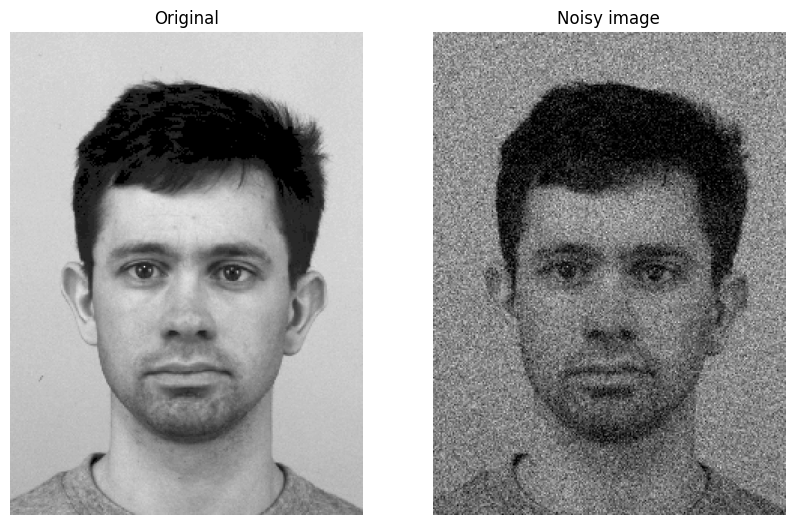

In [ ]:
from skimage.util import random_noise
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/human_n.png', cv.IMREAD_GRAYSCALE)
oimg=img.copy()
# Add noise to the image
noisy_image = random_noise(img)

# Show th original and resulting image
plot_comparison(img, noisy_image, 'Noisy image')

In [ ]:

nose=noisy_image-oimg
#mean square error
mse = np.mean(nose**2)
print('MSE=',mse)
import math
psnr=20 * math.log10(255.0 / math.sqrt(mse))
print('PSNR=',psnr)
#the signal to noise ratio:
snr = np.mean(oimg) / np.mean(nose)
print('SNR=',snr)

MSE= 13289.650677235997
PSNR= 6.895667953459949
SNR= -1.0039688326826481


### Reducing noise
We have a noisy image that we want to improve by removing the noise in it.

Use total variation filter denoising to accomplish this.

<ipython-input-134-d0576d600e71>:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(img, multichannel=True)


MSE= 13247.648269145904
PSNR= 6.909415719824258
SNR= -1.00498868441253


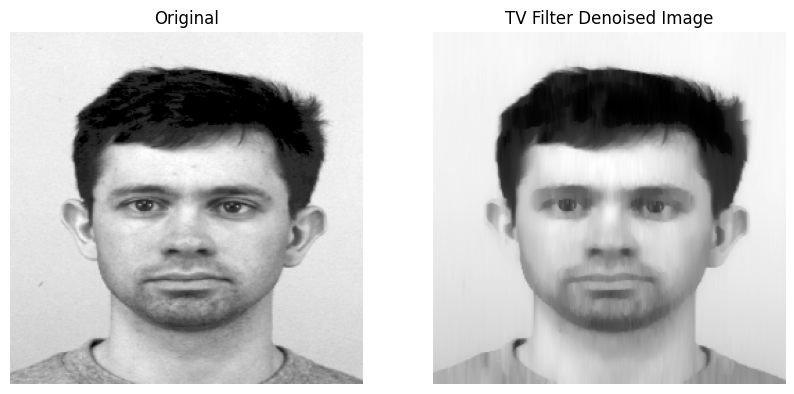

In [ ]:
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(img, multichannel=True)

# Show the noisy and denoised image
plot_comparison(img, denoised_image, 'TV Filter Denoised Image')

nose=denoised_image-img
#mean square error
mse = np.mean(nose**2)
print('MSE=',mse)
import math
psnr=20 * math.log10(255.0 / math.sqrt(mse))
print('PSNR=',psnr)
#the signal to noise ratio:
snr = np.mean(oimg) / np.mean(nose)
print('SNR=',snr)

### Reducing noise while preserving edges
Since we prefer to preserve the edges in the image, the bilateral denoising filter, is used.

<ipython-input-136-6ac2164c86f7>:3: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_bilateral(img, multichannel=False)


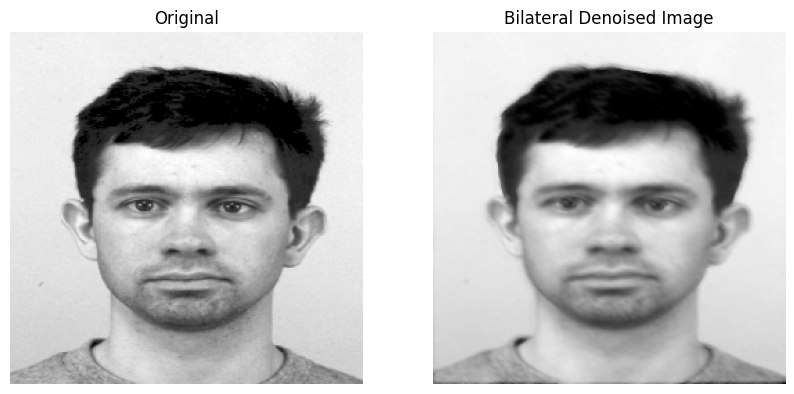

In [ ]:
from skimage.restoration import denoise_bilateral
# Apply bilateral filter denoising
denoised_image = denoise_bilateral(img, multichannel=False)
# Show original and resulting images
plot_comparison(img, denoised_image, 'Bilateral Denoised Image')

In [ ]:
nose=denoised_image-oimg
#mean square error
mse = np.mean(nose**2)
print('MSE=',mse)
import math
psnr=20 * math.log10(255.0 / math.sqrt(mse))
print('PSNR=',psnr)
#the signal to noise ratio:
snr = np.mean(oimg) / np.mean(nose)
print('SNR=',snr)

ValueError: ignored

# Restoration of Blurred Images

Blurred images an be restored by using an image restoration model

## 3.1 Restoration of blurred images

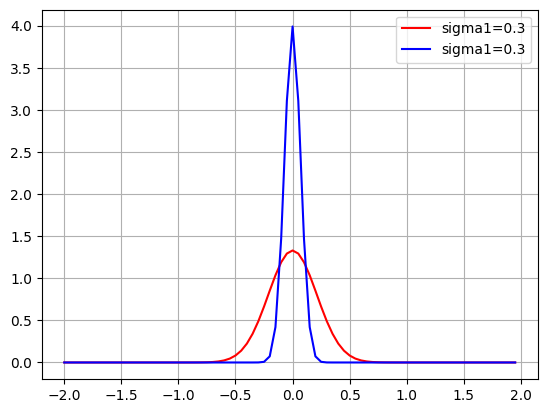

In [ ]:
x=np.arange(-2,2,0.05)
# Parameter sigma is related to the dispersion of values
sigma1=0.3
gaussld_1=(1/(sigma1*np.sqrt(2*np.pi)))*np.exp(-(np.square(x/sigma1)))
sigma2=0.1
gaussld_2=(1/(sigma2*np.sqrt(2*np.pi)))*np.exp(-(np.square(x/sigma2)))
plt.plot(x,gaussld_1,'r'),plt.plot(x,gaussld_2,'b'),plt.grid()
plt.legend(['sigma1=0.3','sigma1=0.3'])

Note that smaller $ \sigma $ distributes the values that is more concentrated around 0, while the red line defines the distribution that spreads more. More sigma approaches to uniform distribution

In [ ]:
def gaussian_filter(k=5, sigma=1.0):
    # Gaussian filter
    # Param k :lateral size of the filter default 5
    arx=np.arange((-k//2)+1.0,(k//2)+1.0)
    x,y=np.meshgrid(arx,arx)
    filt=np.exp(-(1/2)*(np.square(x)+np.square(y))/np.square(sigma))
    return filt/np.sum(filt)

In [ ]:
g1=gaussian_filter(k=5,sigma=0.9)
print(g1)

[[0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.01675038 0.10672687 0.19785944 0.10672687 0.01675038]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]]


Text(0.5, 1.0, 'Gaussian degradation model')

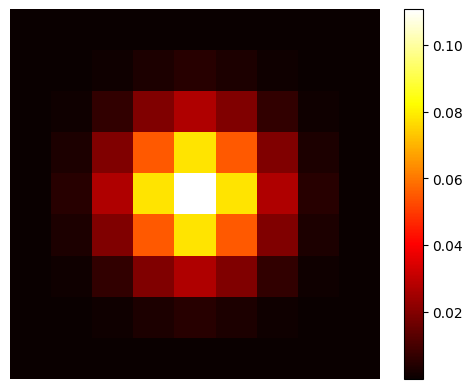

In [ ]:
g2=gaussian_filter(k=9,sigma=1.2)
window_name = 'image'
plt.imshow(g2,cmap='hot',interpolation='nearest') #, interpolation='nearest')
plt.colorbar()
plt.axis('off')
ax.set_title('Gaussian degradation model')

## 3.2 Simulating Blur
In order to simulate blur, image need to be convolve image with one of such functions using the Fourier Transform, Creating an image g, in the Fourier Domain:
$ G(u) =F(u)H(u) $

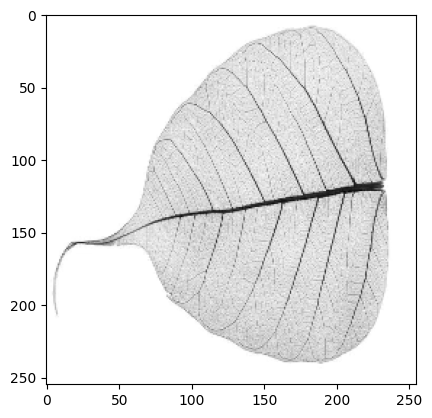

In [ ]:
#read image from google drive
imc = cv.imread('/content/drive/MyDrive/Colab Notebooks/leaf.jpg', cv.IMREAD_GRAYSCALE)
imc = cv.resize(imc, (255, 255))
fig, ax = plt.subplots()
ax.imshow(imc,cmap='gray');
#cv.imwrite('save_img.png',img_2)

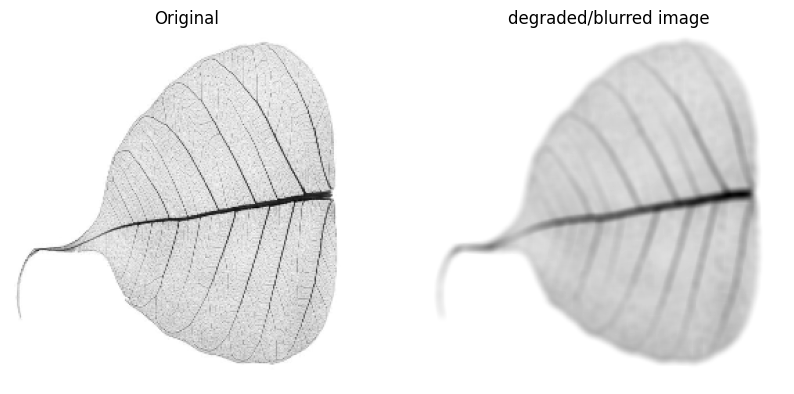

In [ ]:
f=imc
h=gaussian_filter(k=7,sigma=2.5)
# Computing the number of padding on one side
a = int(f.shape[0]//2-h.shape[0]//2)
h_pad=np.pad(h,(a,a),'constant',constant_values=(0))
# Computing the Fourier transfroms
F =fftn(f)
H=fftn(h_pad)
# Convolution
G=np.multiply(F,H)
# Inverse Transform
g=fftshift(ifftn(G).real)
# Show original and resulting images
plot_comparison(f, g, 'degraded/blurred image')

## 3.3 Inverse Filter
The inverse filter is an attempt to inverse the convolution process, obtaining an estimate of the original image $f^cap$
$F(u)=\frac{G(u)}{H(u)}$
Note that we assume knowledge about H, or the degradation function. Therefore, we know h and g, and want to reconstruct f.


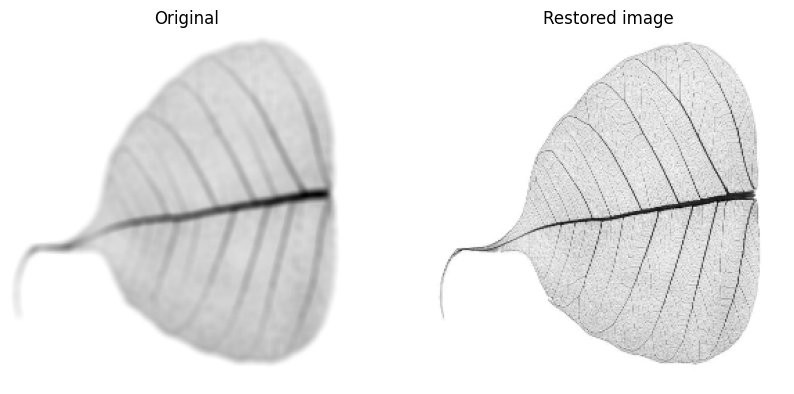

In [ ]:
  F_hat=np.divide(G,H)
  f_hat=ifftn(F_hat).real
  # Show original and resulting images
plot_comparison(g, f_hat, 'Restored image')

As we can see the result of inverse filter is quit good. images with zero valued H and images with added noise can not be reconstructed at all.


## 3.4 Image inpainting


Image inpainting is the process of removing damage, such as noises, strokes or text, on images. It is particularly useful in the restoration of old photographs which might have scratched edges or ink spots on them. These can be digitally removed through this method.

Image inpainting works by replacing the damaged pixels with pixels similar to the neighboring ones, therefore, making them inconspicuous and helping them blend well with the background.

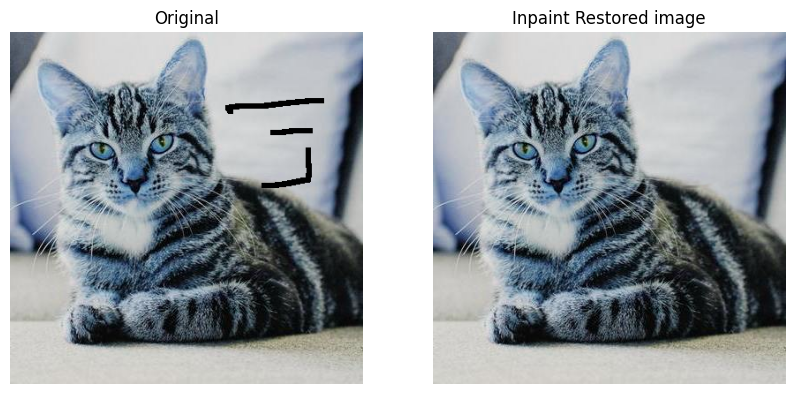

In [ ]:
# using Open CV
# Open the image.
im = cv.imread('/content/drive/MyDrive/Colab Notebooks/cat_damaged.png')
# Load the mask.
mask = cv.imread('/content/drive/MyDrive/Colab Notebooks/cat_mask.png', 0)
# Inpaint.
dst = cv.inpaint(im, mask, 3, cv.INPAINT_NS)
# Write the output.
# Show ther defective image
plot_comparison(im, dst, 'Inpaint Restored image')

<ipython-input-124-b39de04c7e78>:12: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)


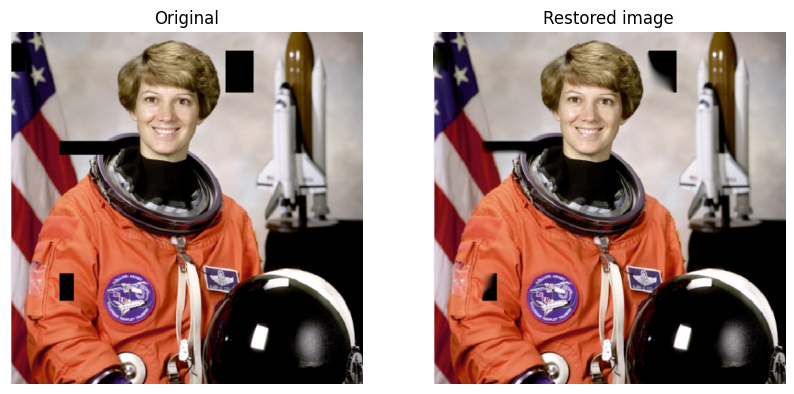

In [ ]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

defect_image = plt.imread('/content/drive/MyDrive/Colab Notebooks/damaged_astronaut.png')
defect_image = resize(defect_image, (512, 512))
defect_image = color.rgba2rgb(defect_image)

mask = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/astronaut_mask.csv').to_numpy()

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

# Show ther defective image
plot_comparison(defect_image, restored_image, 'Restored image')

## 3.5 Removing objects from an image



 another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

<ipython-input-125-1a1a93aa0ee1>:10: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,


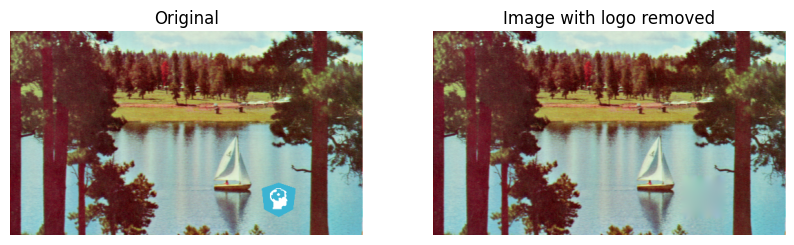

In [ ]:
image_with_logo = plt.imread('/content/drive/MyDrive/Colab Notebooks/4.2.06_w_logo_2_2.png')
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])
# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1
# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)
# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')

## References
1.
https://www.linkedin.com/advice/0/how-do-you-choose-appropriate-image-restoration
2.
https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life
3. Part-01 :
https://www.youtube.com/watch?v=t-oAElHxB4A
4. Part-02:
https://youtu.be/3WoeoVmjtuk
5. Part-03 (with codes)
https://youtu.be/1kli2gqlQPo
6. part -04
https://youtu.be/lm8qkylb5DU
7. Part-05 (with codes)
https://youtu.be/6gweWmvLa-8
8. Latex equation to image png
http://www.latex2png.com/
8. Quality measures for denoising using Python
https://cvnote.ddlee.cc/2019/09/12/psnr-ssim-python